In [1]:
from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [32]:
import pandas as pd

In [33]:
titanic_data = pd.read_csv("Titanic-Dataset.csv")


print(titanic_data.head())

print(titanic_data.info())

print(titanic_data.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier


In [5]:
titanic_data = titanic_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])


In [6]:
imputer = SimpleImputer(strategy='median')
titanic_data['Age'] = imputer.fit_transform(titanic_data[['Age']])
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [7]:
label_encoder = LabelEncoder()
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'])

In [8]:
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [12]:
y_pred = model.predict(X_test)

In [36]:
print(y_pred)

[0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1]


In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [37]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [38]:
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.8212290502793296
Confusion Matrix:
[[92 13]
 [19 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
sns.set(style='whitegrid')

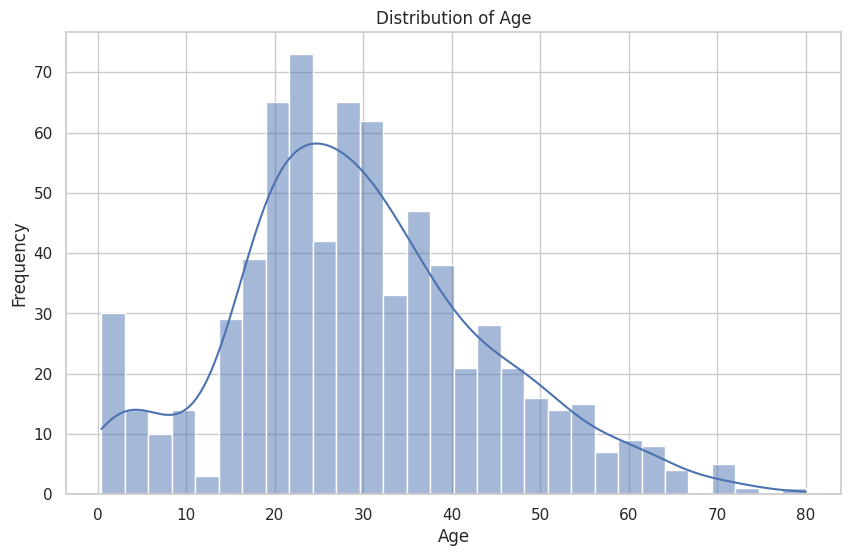

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data['Age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

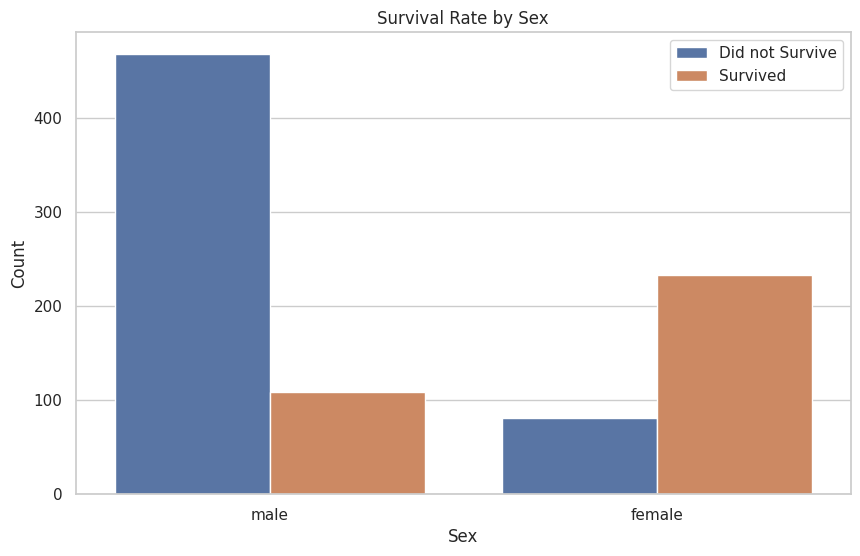

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Survived', data=titanic_data)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(['Did not Survive', 'Survived'])
plt.show()

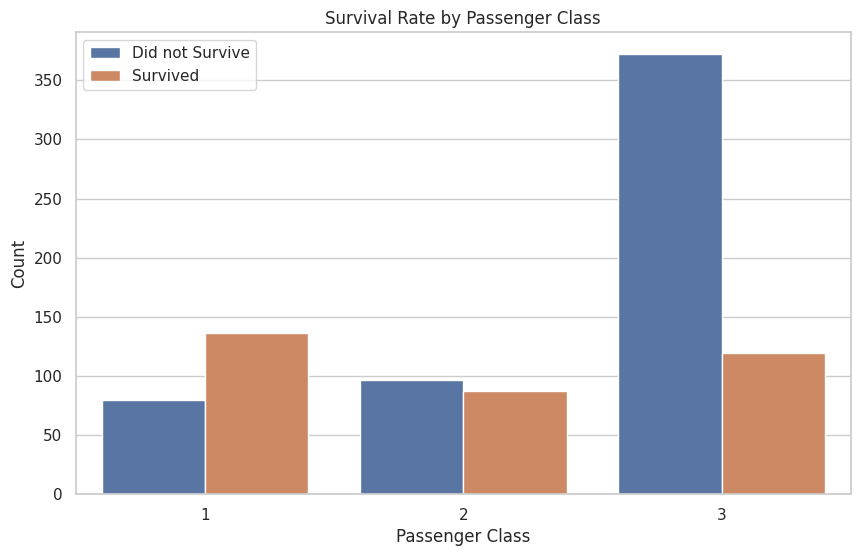

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(['Did not Survive', 'Survived'])
plt.show()

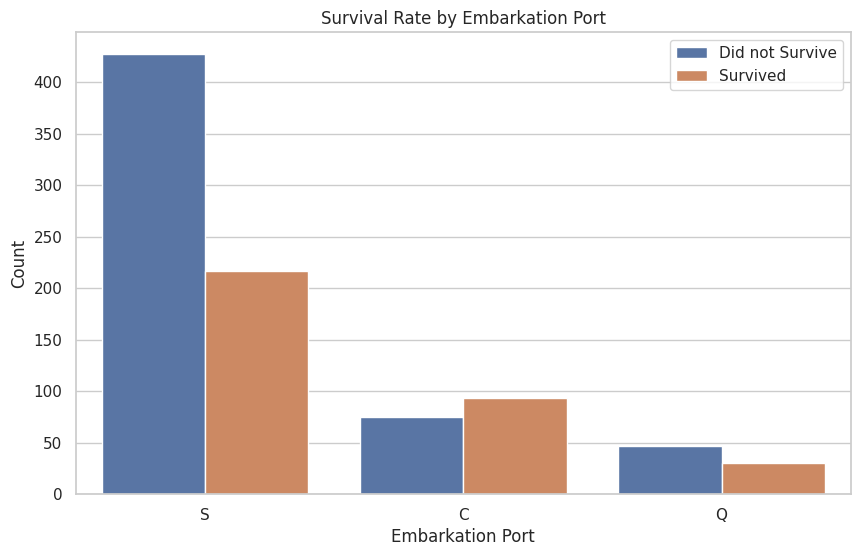

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', hue='Survived', data=titanic_data)
plt.title('Survival Rate by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Count')
plt.legend(['Did not Survive', 'Survived'])
plt.show()

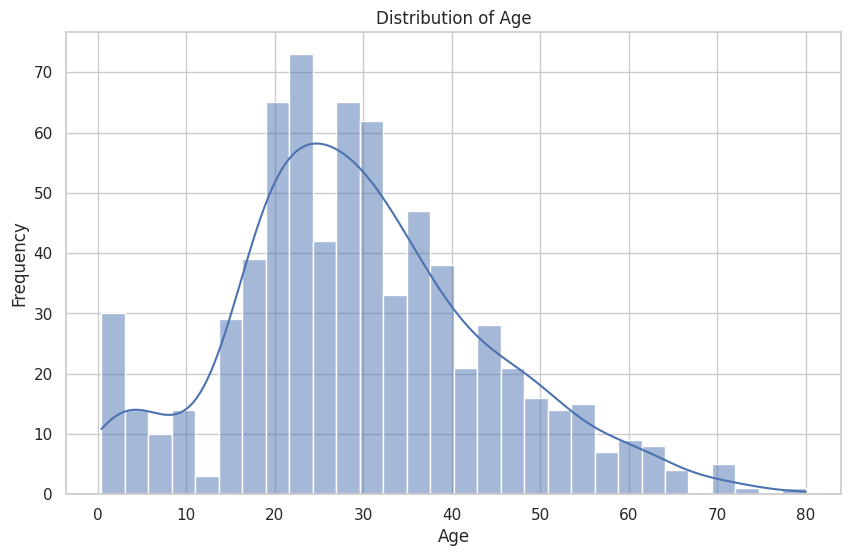

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data['Age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()